In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

# Text Processing
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_mbti = pd.read_csv('/Users/syj/Documents/DeepLearning/deeplearning_class/mbti_y/mbti_clean.csv')

# EDA

In [3]:
total = df_mbti.groupby(['type']).count()*50
print("The Total Posts for every Personality Type")
total

The Total Posts for every Personality Type


,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total post each personality type')

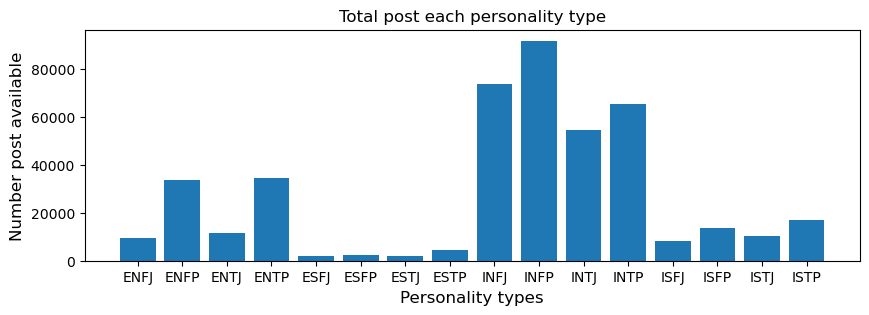

In [4]:
plt.figure(figsize = (10,3))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

In [5]:
#Finding the most common words in all posts.
words = list(df_mbti["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('like', 69675),
 ('think', 49837),
 ('people', 47855),
 ('one', 37167),
 ('know', 36937),
 ('really', 35291),
 ('would', 35015),
 ('get', 30804),
 ('time', 27610),
 ('feel', 23337),
 ('much', 23120),
 ('well', 22926),
 ('s', 22118),
 ('love', 21094),
 ('good', 20720),
 ('things', 20487),
 ('say', 20267),
 ('way', 19653),
 ('something', 19538),
 ('want', 19378),
 ('see', 19136),
 ('also', 18330),
 ('type', 17149),
 ('even', 16914),
 ('always', 16809),
 ('lot', 16440),
 ('someone', 16135),
 ('make', 15869),
 ('life', 15394),
 ('could', 15288),
 ('never', 15250),
 ('go', 15116),
 ('though', 14682),
 ('thing', 14154),
 ('find', 14147),
 ('actually', 13213),
 ('person', 12808),
 ('right', 12711),
 ('going', 12710),
 ('first', 12649),
 ('sure', 12631),
 ('pretty', 12341),
 ('yes', 12277),
 ('friends', 12164),
 ('need', 11565),
 ('still', 10998),
 ('work', 10955),
 ('thought', 10633),
 ('said', 10558),
 ('many', 10383)]

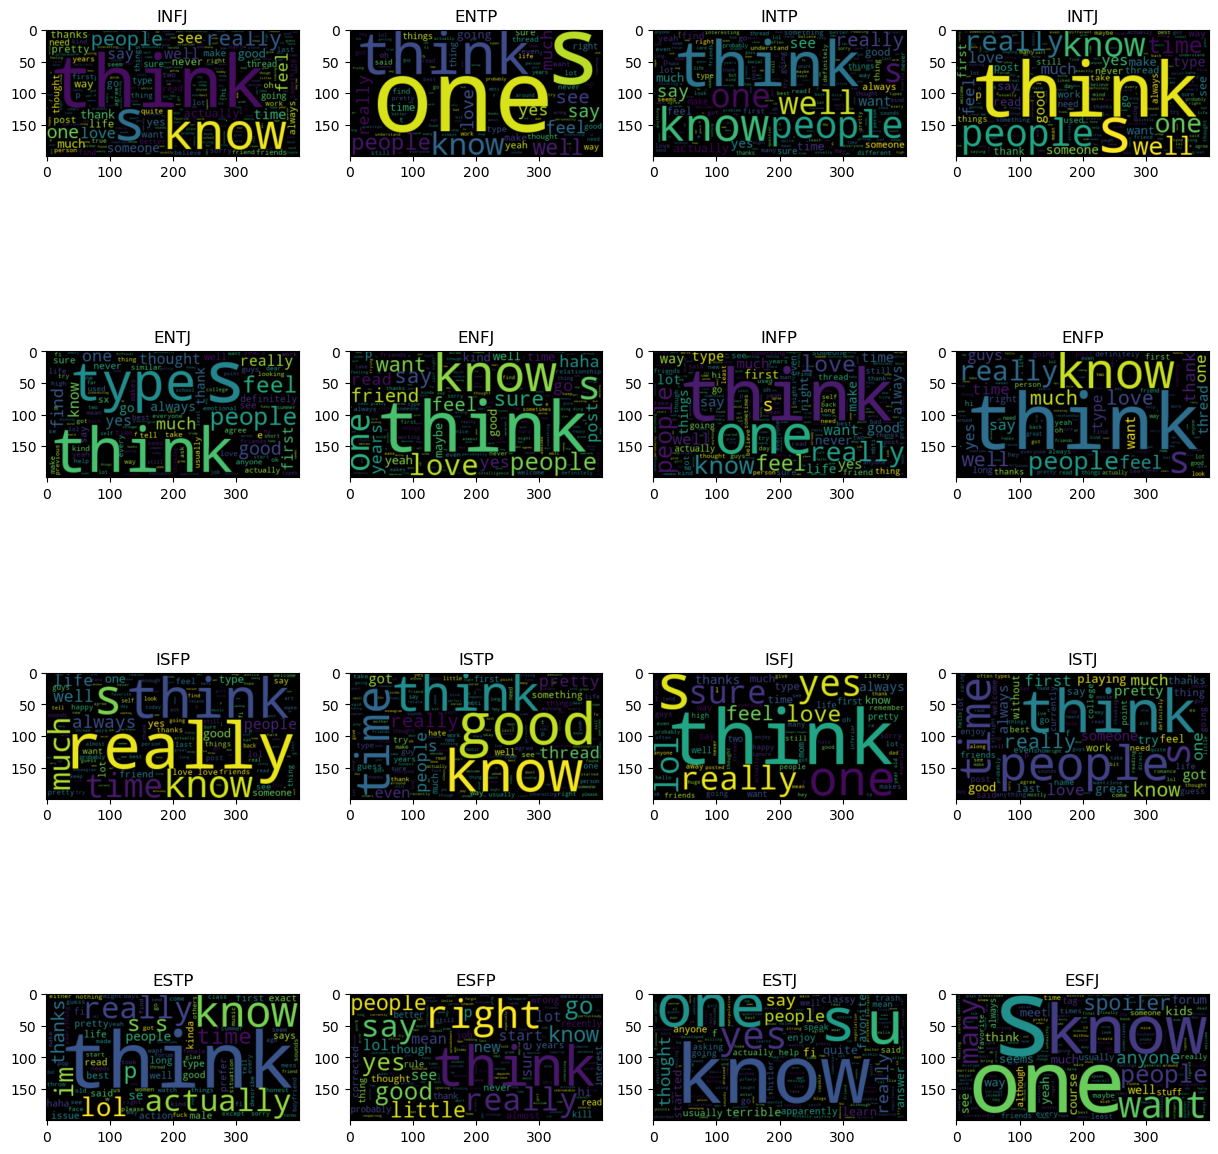

In [6]:
fig, ax = plt.subplots(len(df_mbti['type'].unique()), figsize=(15,len(df_mbti['type'].unique())))
k = 0
for i in df_mbti['type'].unique():
    df_4 = df_mbti[df_mbti['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1